In [13]:
import os

from pyprojroot import here
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
uk_ind = pd.read_excel(
    os.path.join(
        here(), "extract", "Big Data Set - Assessing potential measures of GDP.xlsx"
        ), sheet_name="Tabelle1", skiprows=3)

uk_ind.head()

,Month,Monthly index of gross domestic product in the United Kingdom from January 1997 to October 2022,GDP % Change,"Gross new monthly consumer lending excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)","Outstanding consumer credit excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)",Inflation rate for the Consumer Price Index (CPI) in the United Kingdom from January 1989 to November 2022,"Number of people employed in the United Kingdom from March 1971 to October 2022 (in 1,000s)",Total monthly sales value of all retailing including automotive fuel in Great Britain from January 2017 to August 2022 (in billion GBP),House price index in the United Kingdom (UK) from January 2015 to June 2022
0,2007-01-01,84.0,NaN,16970.0,190982.0,0.027,29202.0,29.9182,28.385604
1,2007-02-01,84.6,0.007143,16371.0,190795.0,0.028,29175.0,30.0056,29.127857
2,2007-03-01,84.9,0.003546,16676.0,190920.0,0.031,29194.0,30.0932,29.870110
3,2007-04-01,84.9,0.000000,16636.0,191040.0,0.028,29232.0,30.1810,30.612363
4,2007-05-01,85.0,0.001178,16638.0,191107.0,0.025,29314.0,30.2690,31.354615


In [28]:
uk_ind.dtypes

Month                                                                                                                                             datetime64[ns]
Monthly index of gross domestic product in the United Kingdom from January 1997 to October 2022                                                          float64
GDP % Change                                                                                                                                             float64
Gross new monthly consumer lending excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)           float64
Outstanding consumer credit excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)                  float64
Inflation rate for the Consumer Price Index (CPI) in the United Kingdom from January 1989 to November 2022                                               float64
Number of people employed in the U

<AxesSubplot: >

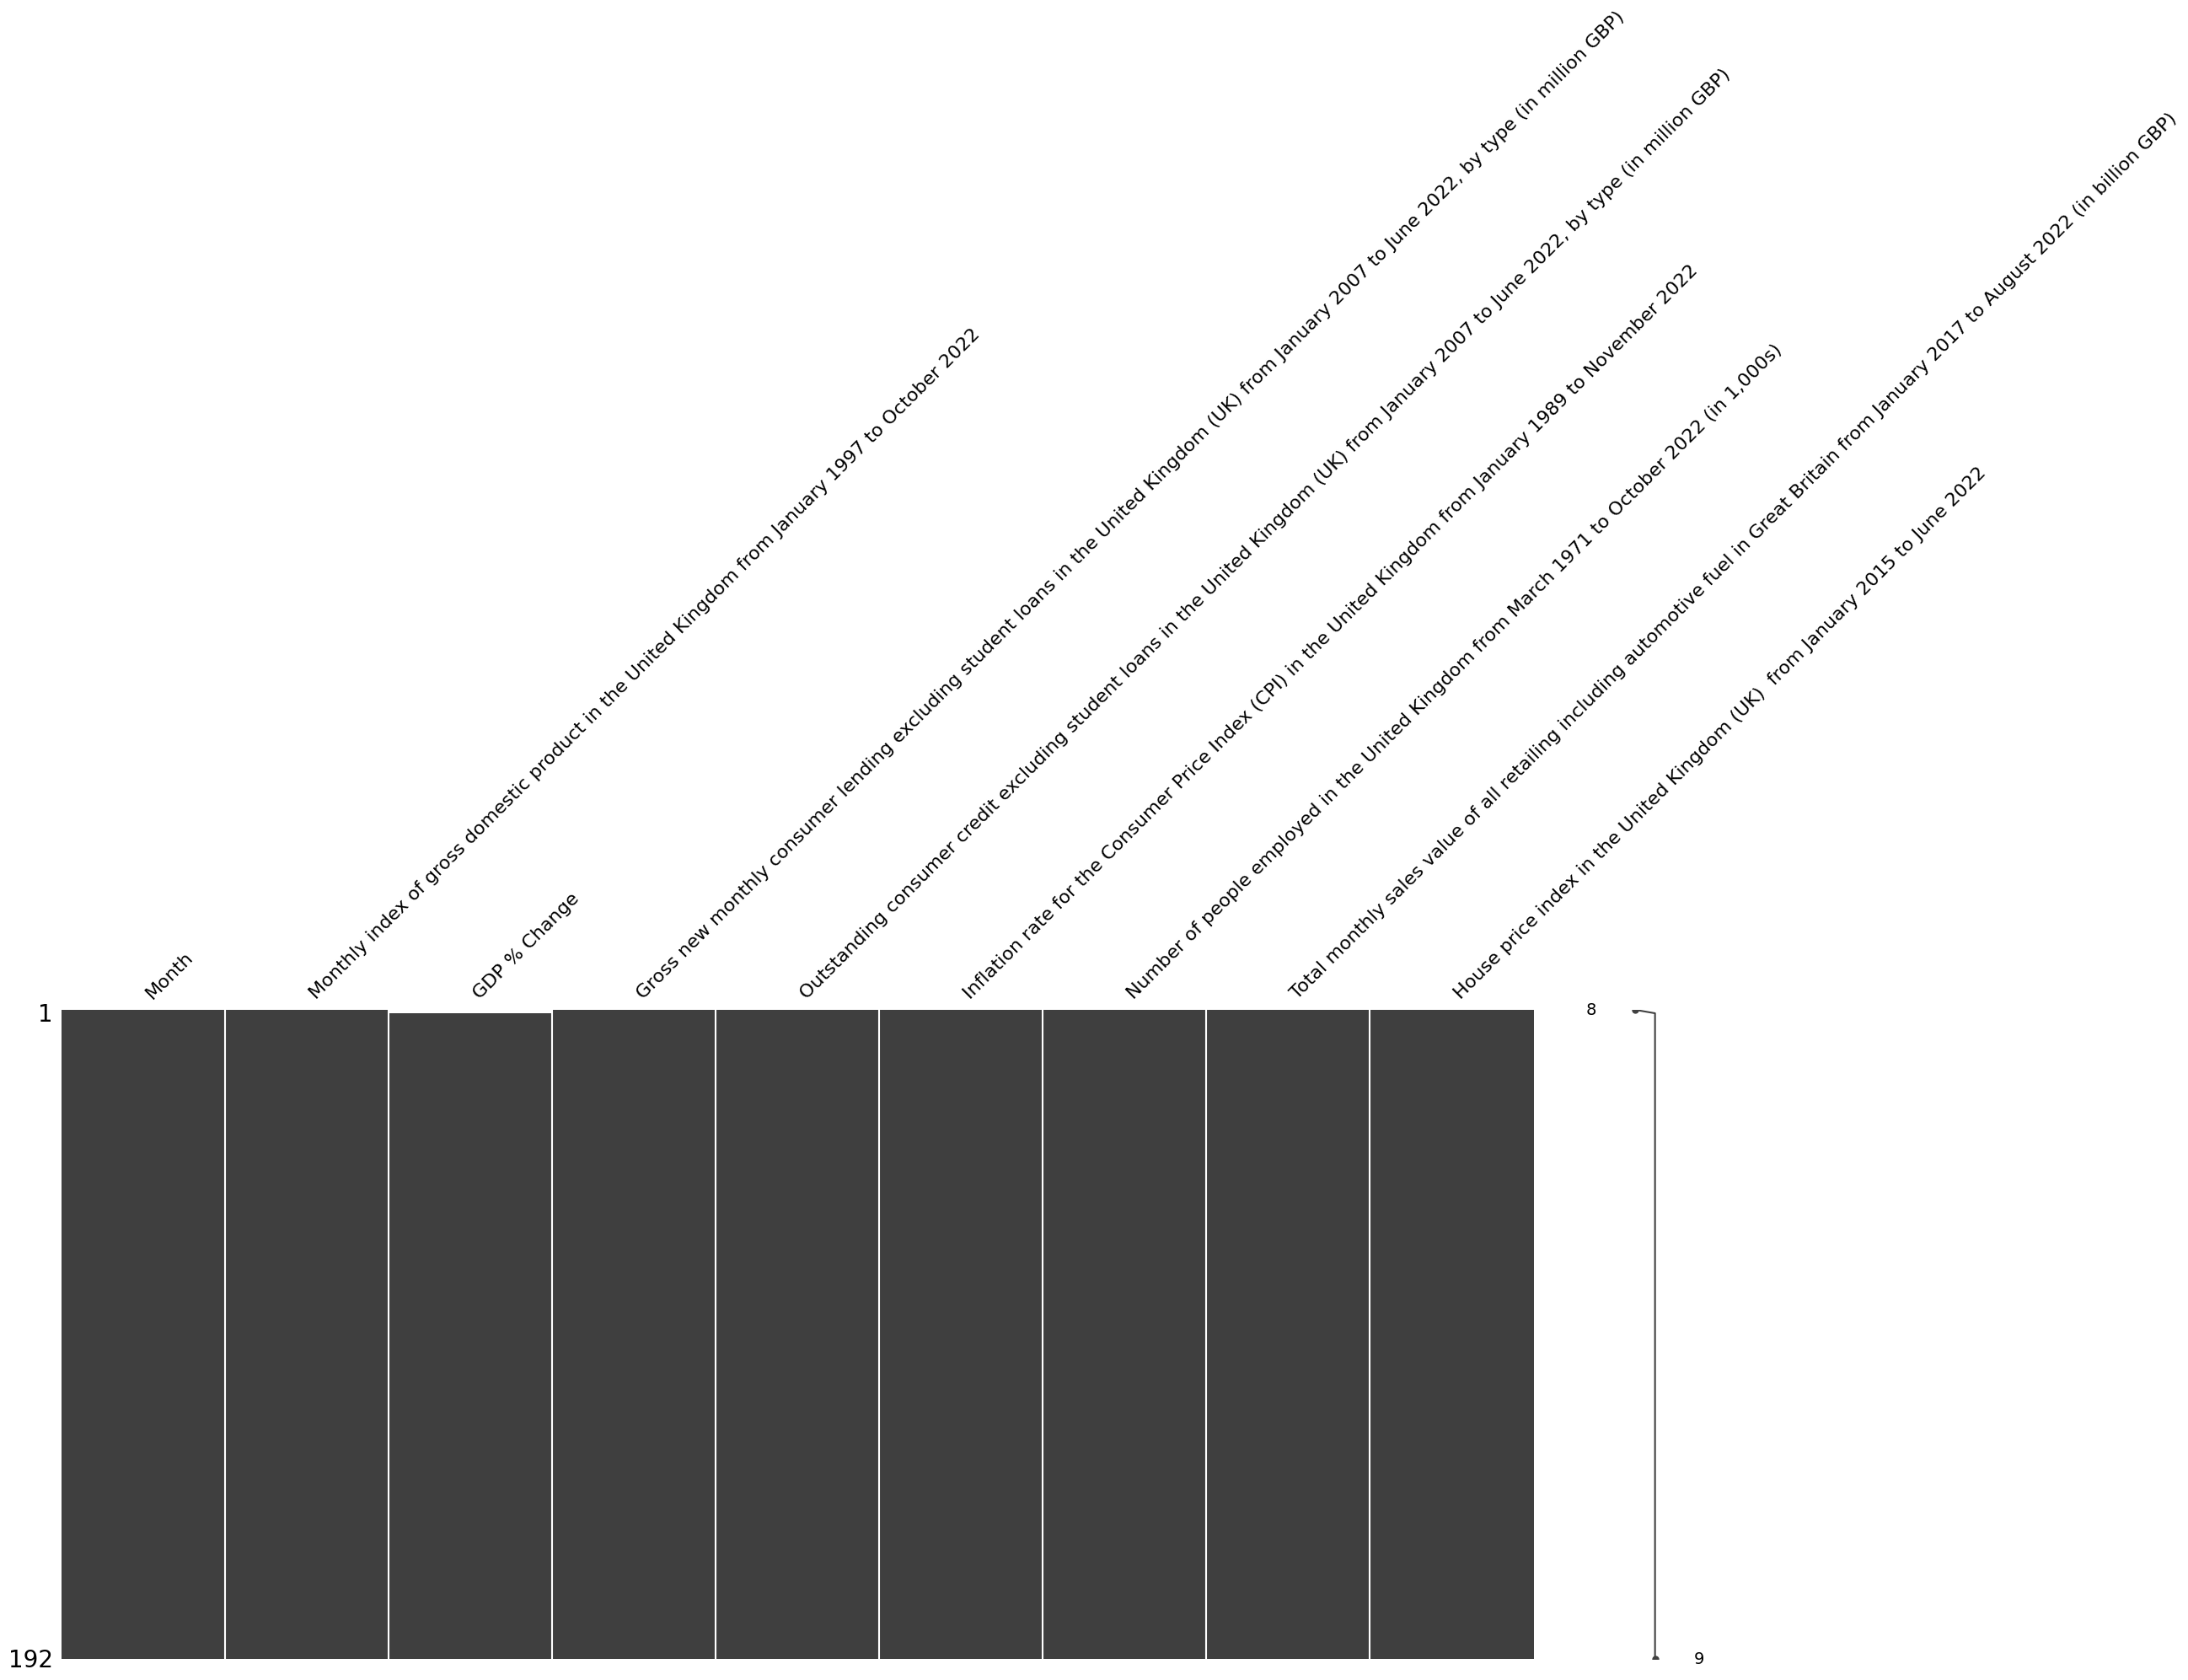

In [15]:
msno.matrix(uk_ind)

In [16]:
uk_ind.isna().sum()
# one missing value in GDP%change

Month                                                                                                                                             0
Monthly index of gross domestic product in the United Kingdom from January 1997 to October 2022                                                   0
GDP % Change                                                                                                                                      1
Gross new monthly consumer lending excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)    0
Outstanding consumer credit excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)           0
Inflation rate for the Consumer Price Index (CPI) in the United Kingdom from January 1989 to November 2022                                        0
Number of people employed in the United Kingdom from March 1971 to October 2022 (in 1,000s)                     

In [24]:
uk_ind.iloc[:, 2].head()
# fcolis a rolling diff

0         NaN
1    0.007143
2    0.003546
3    0.000000
4    0.001178
Name: GDP % Change, dtype: float64

/var/folders/d3/cjvn_l1n13z5z3t6nz554p8r0000gq/T/ipykernel_56482/1457005634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = uk_ind.corr()


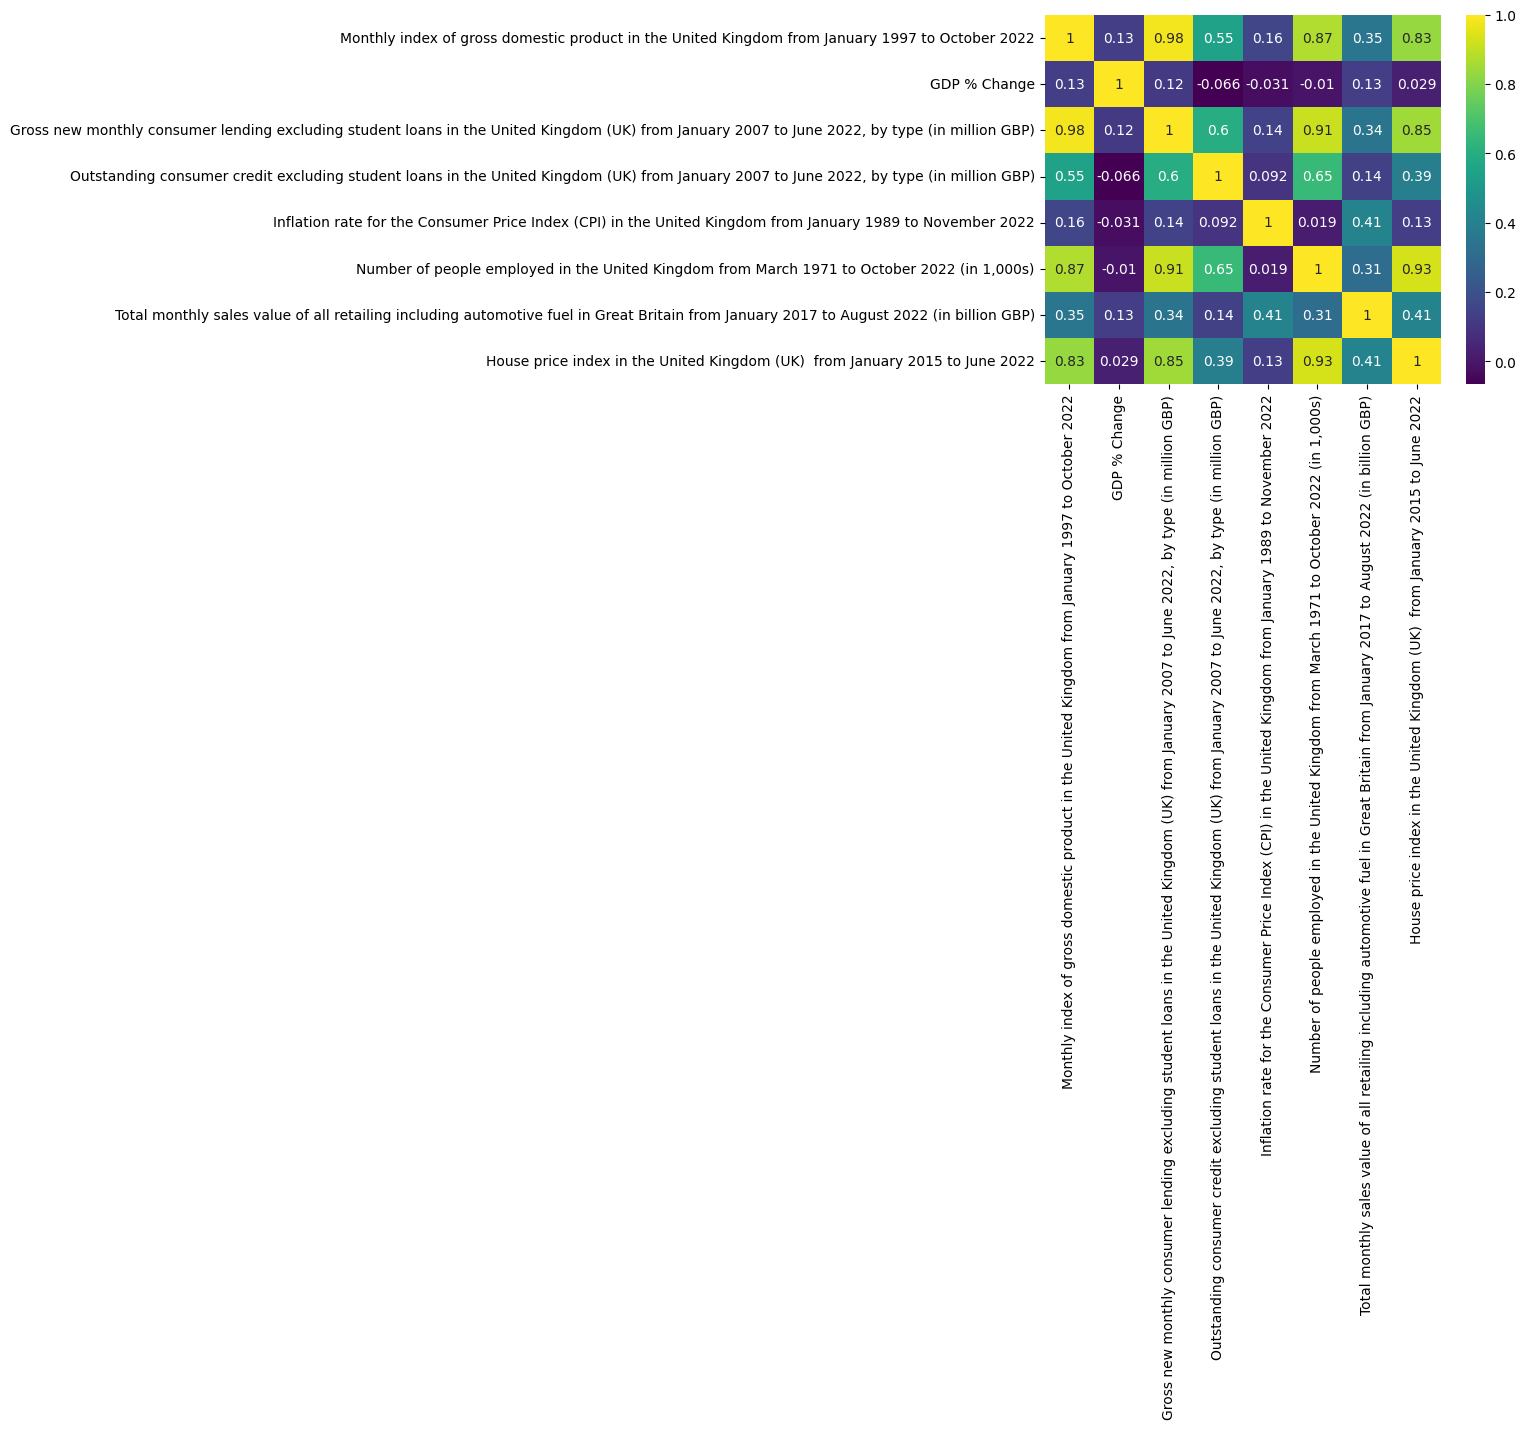

In [26]:
corr_matrix = uk_ind.corr()
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.show()

In [31]:
rename_map = {
       'Monthly index of gross domestic product in the United Kingdom from January 1997 to October 2022': "monthly gdp index",
       'Gross new monthly consumer lending excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)',
       'Outstanding consumer credit excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)',
       'Inflation rate for the Consumer Price Index (CPI) in the United Kingdom from January 1989 to November 2022',
       'Number of people employed in the United Kingdom from March 1971 to October 2022 (in 1,000s)',
       'Total monthly sales value of all retailing including automotive fuel in Great Britain from January 2017 to August 2022 (in billion GBP)',
       'House price index in the United Kingdom (UK)  from January 2015 to June 2022'}

Index(['Month',
       'Monthly index of gross domestic product in the United Kingdom from January 1997 to October 2022',
       'GDP % Change',
       'Gross new monthly consumer lending excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)',
       'Outstanding consumer credit excluding student loans in the United Kingdom (UK) from January 2007 to June 2022, by type (in million GBP)',
       'Inflation rate for the Consumer Price Index (CPI) in the United Kingdom from January 1989 to November 2022',
       'Number of people employed in the United Kingdom from March 1971 to October 2022 (in 1,000s)',
       'Total monthly sales value of all retailing including automotive fuel in Great Britain from January 2017 to August 2022 (in billion GBP)',
       'House price index in the United Kingdom (UK)  from January 2015 to June 2022'],
      dtype='object')

In [36]:
newnms = list()
for nm in uk_ind.columns:
    newnms.append(nm[0:40].strip().lower())
uk_ind.columns = newnms

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

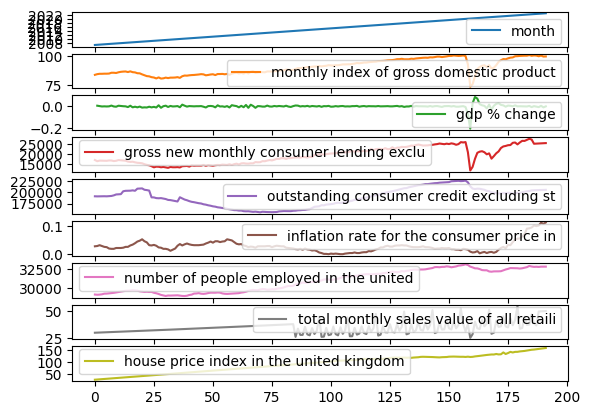

In [37]:
uk_ind.plot(subplots=True)